(python_by_example)=

# An Introductory Example


**This content is from the *Scientific Python QuickStart* by [Thomas J. Sargent](http://www.tomsargent.com/) and [John
Stachurski](https://johnstachurski.net/), originally published as the [JupyterBook example](https://executablebooks.github.io/quantecon-mini-example/docs/index.html).
We will be gradually adding more introductory Python materials by actuarial contributors. In the meantime, consider also referring to the [Python Study Group microsite](https://actuaries.asn.au/microsites/actuaries-in-data-analytics/knowledge/python-study-group) for materials from the 2021 YDAWG-organised sessions.**


## Overview

We\'re now ready to start learning the Python language itself.

In this lecture, we will write and then pick apart small Python
programs.

The objective is to introduce you to basic Python syntax and data
structures.

Deeper concepts will be covered in later lectures.

You should have read the {ref}`lecture <getting_started>` on getting started with Python before beginning this one.

## The Task: Plotting a White Noise Process

Suppose we want to simulate and plot the white noise process
$\epsilon_0, \epsilon_1, \ldots, \epsilon_T$, where each draw
$\epsilon_t$ is independent standard normal.

In other words, we want to generate figures that look something like
this:

```{figure} /_static/lecture_specific/python_by_example/test_program_1_updated.png
```

(Here $t$ is on the horizontal axis and $\epsilon_t$ is on the vertical
axis.)

We\'ll do this in several different ways, each time learning something
more about Python.

We run the following command first, which helps ensure that plots appear
in the notebook if you run it on your own machine.

In [1]:
%matplotlib inline

## Version 1

(ourfirstprog)=

Here are a few lines of code that perform the task we set

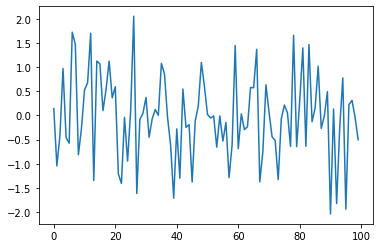

In [2]:
import numpy as np
import matplotlib.pyplot as plt

ϵ_values = np.random.randn(100)
plt.plot(ϵ_values)
plt.show()

Let\'s break this program down and see how it works.

(import)=

### Imports

The first two lines of the program import functionality from external
code libraries.

The first line imports NumPy, a
favorite Python package for tasks like

-   working with arrays (vectors and matrices)
-   common mathematical functions like `cos` and `sqrt`
-   generating random numbers
-   linear algebra, etc.

After `import numpy as np` we have access to these attributes via the
syntax `np.attribute`.

Here\'s two more examples

In [3]:
np.sqrt(4)

2.0

In [4]:
np.log(4)

1.3862943611198906

We could also use the following syntax:

In [5]:
import numpy

numpy.sqrt(4)

2.0

But the former method (using the short name `np`) is convenient and more
standard.

#### Why So Many Imports?

Python programs typically require several import statements.

The reason is that the core language is deliberately kept small, so that
it\'s easy to learn and maintain.

When you want to do something interesting with Python, you almost always
need to import additional functionality.

#### Packages

As stated above, NumPy is a Python *package*.

Packages are used by developers to organize code they wish to share.

In fact, a package is just a directory containing

1.  files with Python code --- called **modules** in Python speak
2.  possibly some compiled code that can be accessed by Python (e.g.,
    functions compiled from C or FORTRAN code)
3.  a file called `__init__.py` that specifies what will be executed
    when we type `import package_name`

In fact, you can find and explore the directory for NumPy on your
computer easily enough if you look around.

On this machine, it\'s located in

```{code-block} none
anaconda3/lib/python3.7/site-packages/numpy
```

#### Subpackages

Consider the line `ϵ_values = np.random.randn(100)`.

Here `np` refers to the package NumPy, while `random` is a
**subpackage** of NumPy.

Subpackages are just packages that are subdirectories of another
package.

### Importing Names Directly

Recall this code that we saw above

In [6]:
import numpy as np

np.sqrt(4)

2.0

Here\'s another way to access NumPy\'s square root function

In [7]:
from numpy import sqrt

sqrt(4)

2.0

This is also fine.

The advantage is less typing if we use `sqrt` often in our code.

The disadvantage is that, in a long program, these two lines might be
separated by many other lines.

Then it\'s harder for readers to know where `sqrt` came from, should
they wish to.

### Random Draws

Returning to our program that plots white noise, the remaining three
lines after the import statements are

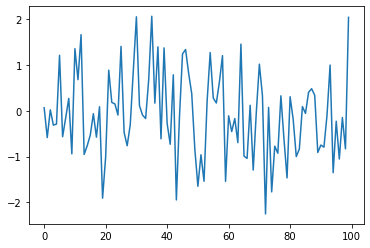

In [8]:
ϵ_values = np.random.randn(100)
plt.plot(ϵ_values)
plt.show()

The first line generates 100 (quasi) independent standard normals and
stores them in `ϵ_values`.

The next two lines genererate the plot.

We can and will look at various ways to configure and improve this plot
below.

## Alternative Implementations

Let\'s try writing some alternative versions of
{ref}`our first program <ourfirstprog>`, which
plotted IID draws from the normal distribution.

The programs below are less efficient than the original one, and hence
somewhat artificial.

But they do help us illustrate some important Python syntax and
semantics in a familiar setting.

### A Version with a For Loop

Here\'s a version that illustrates `for` loops and Python lists.

(firstloopprog)=

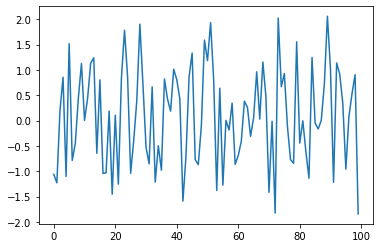

In [9]:
ts_length = 100
ϵ_values = []   # empty list

for i in range(ts_length):
    e = np.random.randn()
    ϵ_values.append(e)

plt.plot(ϵ_values)
plt.show()

In brief,

-   The first line sets the desired length of the time series.
-   The next line creates an empty *list* called `ϵ_values` that will
    store the $\epsilon_t$ values as we generate them.
-   The statement `# empty list` is a *comment*, and is ignored by
    Python\'s interpreter.
-   The next three lines are the `for` loop, which repeatedly draws a
    new random number $\epsilon_t$ and appends it to the end of the list
    `ϵ_values`.
-   The last two lines generate the plot and display it to the user.

Let\'s study some parts of this program in more detail.

(lists_ref)=

### Lists

Consider the statement `ϵ_values = []`, which creates an empty list.

Lists are a *native Python data structure* used to group a collection of
objects.

For example, try

In [10]:
x = [10, 'foo', False]
type(x)

list

The first element of `x` is an
[integer](https://en.wikipedia.org/wiki/Integer_%28computer_science%29),
the next is a
[string](https://en.wikipedia.org/wiki/String_%28computer_science%29),
and the third is a [Boolean value](https://en.wikipedia.org/wiki/Boolean_data_type).

When adding a value to a list, we can use the syntax
`list_name.append(some_value)`

In [11]:
x

[10, 'foo', False]

In [12]:
x.append(2.5)
x

[10, 'foo', False, 2.5]

Here `append()` is what\'s called a *method*, which is a function
\"attached to\" an object---in this case, the list `x`.

We\'ll learn all about methods later on, but just to give you some idea,

-   Python objects such as lists, strings, etc. all have methods that
    are used to manipulate the data contained in the object.
-   String objects have [string methods](https://docs.python.org/3/library/stdtypes.html#string-methods),
    list objects have [list methods](https://docs.python.org/3/tutorial/datastructures.html#more-on-lists),
    etc.

Another useful list method is `pop()`

In [13]:
x

[10, 'foo', False, 2.5]

In [14]:
x.pop()

2.5

In [15]:
x

[10, 'foo', False]

Lists in Python are zero-based (as in C, Java or Go), so the first
element is referenced by `x[0]`

In [16]:
x[0]   # first element of x

10

In [17]:
x[1]   # second element of x

'foo'

### The For Loop

Now let\'s consider the `for` loop from
{ref}`the program above <firstloopprog>`, which
was

In [18]:
for i in range(ts_length):
    e = np.random.randn()
    ϵ_values.append(e)

Python executes the two indented lines `ts_length` times before moving
on.

These two lines are called a `code block`, since they comprise the
\"block\" of code that we are looping over.

Unlike most other languages, Python knows the extent of the code block
*only from indentation*.

In our program, indentation decreases after line `ϵ_values.append(e)`,
telling Python that this line marks the lower limit of the code block.

More on indentation below---for now, let\'s look at another example of
a `for` loop

In [19]:
animals = ['dog', 'cat', 'bird']
for animal in animals:
    print("The plural of " + animal + " is " + animal + "s")

The plural of dog is dogs
The plural of cat is cats
The plural of bird is birds


This example helps to clarify how the `for` loop works: When we execute
a loop of the form

```{code-block}
---
class: no-execute
---

for variable_name in sequence:
    <code block>
```

The Python interpreter performs the following:

-   For each element of the `sequence`, it \"binds\" the name
    `variable_name` to that element and then executes the code block.

The `sequence` object can in fact be a very general object, as we\'ll
see soon enough.

### A Comment on Indentation

In discussing the `for` loop, we explained that the code blocks being
looped over are delimited by indentation.

In fact, in Python, **all** code blocks (i.e., those occurring inside
loops, if clauses, function definitions, etc.) are delimited by
indentation.

Thus, unlike most other languages, whitespace in Python code affects the
output of the program.

Once you get used to it, this is a good thing: It

-   forces clean, consistent indentation, improving readability
-   removes clutter, such as the brackets or end statements used in
    other languages

On the other hand, it takes a bit of care to get right, so please
remember:

-   The line before the start of a code block always ends in a colon
    -   `for i in range(10):`
    -   `if x > y:`
    -   `while x < 100:`
    -   etc., etc.
-   All lines in a code block **must have the same amount of indentation**.
-   The Python standard is 4 spaces, and that\'s what you should use.

### While Loops

The `for` loop is the most common technique for iteration in Python.

But, for the purpose of illustration, let\'s modify
{ref}`the program above <firstloopprog>` to use
a `while` loop instead.

(whileloopprog)=

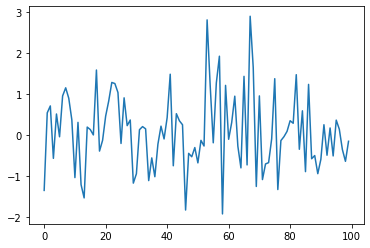

In [20]:
ts_length = 100
ϵ_values = []
i = 0
while i < ts_length:
    e = np.random.randn()
    ϵ_values.append(e)
    i = i + 1
plt.plot(ϵ_values)
plt.show()

Note that

-   the code block for the `while` loop is again delimited only by indentation
-   the statement `i = i + 1` can be replaced by `i += 1`

## Another Application

Let\'s do one more application before we turn to exercises.

In this application, we plot the balance of a bank account over time.

There are no withdraws over the time period, the last date of which is
denoted by $T$.

The initial balance is $b_0$ and the interest rate is $r$.

The balance updates from period $t$ to $t+1$ according to

```{math}
:label: ilom
    b_{t+1} = (1 + r) b_t
```

In the code below, we generate and plot the sequence $b_0, b_1, \ldots, b_T$
generated by {eq}`ilom`.

Instead of using a Python list to store this sequence, we will use a
NumPy array.

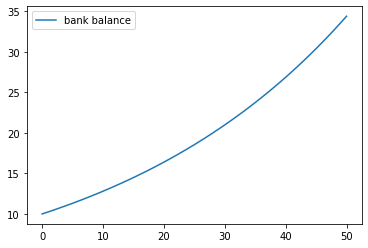

In [21]:
r = 0.025         # interest rate
T = 50            # end date
b = np.empty(T+1) # an empty NumPy array, to store all b_t
b[0] = 10         # initial balance

for t in range(T):
    b[t+1] = (1 + r) * b[t]

plt.plot(b, label='bank balance')
plt.legend()
plt.show()

The statement `b = np.empty(T+1)` allocates storage in memory for `T+1`
(floating point) numbers.

These numbers are filled in by the `for` loop.

Allocating memory at the start is more efficient than using a Python
list and `append`, since the latter must repeatedly ask for storage
space from the operating system.

Notice that we added a legend to the plot --- a feature you will be
asked to use in the exercises.

## Exercises

Now we turn to exercises. It is important that you complete them before
continuing, since they present new concepts we will need.

### Exercise 1

Your first task is to simulate and plot the correlated time series

$$
x_{t+1} = \alpha \, x_t + \epsilon_{t+1}
\quad \text{where} \quad
x_0 = 0
\quad \text{and} \quad t = 0,\ldots,T
$$

The sequence of shocks $\{\epsilon_t\}$ is assumed to be IID and
standard normal.

In your solution, restrict your import statements to

In [22]:
import numpy as np
import matplotlib.pyplot as plt

Set $T=200$ and $\alpha = 0.9$.

### Exercise 2

Starting with your solution to exercise 2, plot three simulated time
series, one for each of the cases $\alpha=0$, $\alpha=0.8$ and
$\alpha=0.98$.

Use a `for` loop to step through the $\alpha$ values.

If you can, add a legend, to help distinguish between the three time
series.

Hints:

-   If you call the `plot()` function multiple times before calling
    `show()`, all of the lines you produce will end up on the same
    figure.
-   For the legend, noted that the expression `'foo' + str(42)`
    evaluates to `'foo42'`.

### Exercise 3

Similar to the previous exercises, plot the time series

$$
x_{t+1} = \alpha \, |x_t| + \epsilon_{t+1}
\quad \text{where} \quad
x_0 = 0
\quad \text{and} \quad t = 0,\ldots,T
$$

Use $T=200$, $\alpha = 0.9$ and $\{\epsilon_t\}$ as before.

Search online for a function that can be used to compute the absolute
value $|x_t|$.

### Exercise 4

One important aspect of essentially all programming languages is
branching and conditions.

In Python, conditions are usually implemented with if--else syntax.

Here\'s an example, that prints -1 for each negative number in an array
and 1 for each nonnegative number

In [23]:
numbers = [-9, 2.3, -11, 0]

In [24]:
for x in numbers:
    if x < 0:
        print(-1)
    else:
        print(1)

-1
1
-1
1


Now, write a new solution to Exercise 3 that does not use an existing
function to compute the absolute value.

Replace this existing function with an if--else condition.

(pbe_ex3)=

### Exercise 5

Here\'s a harder exercise, that takes some thought and planning.

The task is to compute an approximation to $\pi$ using [Monte Carlo](https://en.wikipedia.org/wiki/Monte_Carlo_method).

Use no imports besides

In [25]:
import numpy as np

Your hints are as follows:

-   If $U$ is a bivariate uniform random variable on the unit square
    $(0, 1)^2$, then the probability that $U$ lies in a subset $B$ of
    $(0,1)^2$ is equal to the area of $B$.
-   If $U_1,\ldots,U_n$ are IID copies of $U$, then, as $n$ gets large,
    the fraction that falls in $B$, converges to the probability of
    landing in $B$.
-   For a circle, $area = \pi * radius^2$.

## Solutions

### Exercise 1

Here\'s one solution.

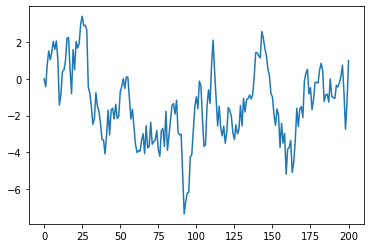

In [26]:
α = 0.9
T = 200
x = np.empty(T+1)
x[0] = 0

for t in range(T):
    x[t+1] = α * x[t] + np.random.randn()

plt.plot(x)
plt.show()

### Exercise 2

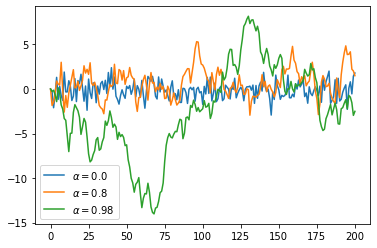

In [27]:
α_values = [0.0, 0.8, 0.98]
T = 200
x = np.empty(T+1)

for α in α_values:
    x[0] = 0
    for t in range(T):
        x[t+1] = α * x[t] + np.random.randn()
    plt.plot(x, label=f'$\\alpha = {α}$')

plt.legend()
plt.show()

### Exercise 3

Here\'s one solution:

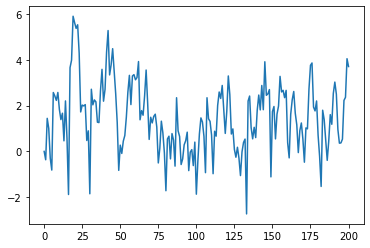

In [28]:
α = 0.9
T = 200
x = np.empty(T+1)
x[0] = 0

for t in range(T):
    x[t+1] = α * np.abs(x[t]) + np.random.randn()

plt.plot(x)
plt.show()

### Exercise 4

Here\'s one way:

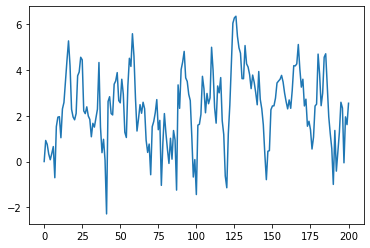

In [29]:
α = 0.9
T = 200
x = np.empty(T+1)
x[0] = 0

for t in range(T):
    if x[t] < 0:
        abs_x = - x[t]
    else:
        abs_x = x[t]
    x[t+1] = α * abs_x + np.random.randn()

plt.plot(x)
plt.show()

Here\'s a shorter way to write the same thing:

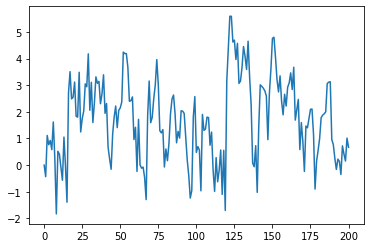

In [30]:
α = 0.9
T = 200
x = np.empty(T+1)
x[0] = 0

for t in range(T):
    abs_x = - x[t] if x[t] < 0 else x[t]
    x[t+1] = α * abs_x + np.random.randn()

plt.plot(x)
plt.show()

### Exercise 5

Consider the circle of diameter 1 embedded in the unit square.

Let $A$ be its area and let $r=1/2$ be its radius.

If we know $\pi$ then we can compute $A$ via $A = \pi r^2$.

But here the point is to compute $\pi$, which we can do by
$\pi = A / r^2$.

Summary: If we can estimate the area of a circle with diameter 1, then
dividing by $r^2 = (1/2)^2 = 1/4$ gives an estimate of $\pi$.

We estimate the area by sampling bivariate uniforms and looking at the
fraction that falls into the circle.

In [31]:
n = 100000

count = 0
for i in range(n):
    u, v = np.random.uniform(), np.random.uniform()
    d = np.sqrt((u - 0.5)**2 + (v - 0.5)**2)
    if d < 0.5:
        count += 1

area_estimate = count / n

print(area_estimate * 4)  # dividing by radius**2

3.13708
